# PREDICT THE EXISTENCE OF PCOS IN FEMALE 

In this study, we used two experimental setups: one with all features and one with a subset of features selected using an embedded method to compare the performance of each machine learning model and see which approach works better for predicting the presence of Polycystic Ovary Syndrome (PCOS). 

For the study of predicting presence of PCOS using a dataset of 541 data points, we considered including the following algorithms:

K-Nearest Neighbor (KNN)
Support Vector Machines (SVM)
Logistic Regression
Random Forest
XGboosting

We will add noise to our dataset to test the robustness of these machine learning models and understand how they might perform on more realistic or noisy data. Noisy data will be implemented in both setups.

# FIRST EXPERIMENTAL SETUP: INCLUDE ALL FEATURES FOR PREDICTING THE PRESENCE OF PCOS

In [416]:
# imports
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import svm
import xgboost as xgb


In [198]:
# import dataframe
df = pd.read_csv("PCOS_data_without_infertility.csv")
df.shape

(541, 45)

In [50]:
# change categorical features to ordinals 
# all features
df_categorical = df.columns
le = LabelEncoder()
# chaning categorical features in list to ordinal values
for feat in df_categorical:
    df[f'{feat}'] = le.fit_transform(df[f'{feat}'])

In [51]:
X = df[[' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']]
y = df['PCOS (Y/N)']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
# dataset standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

Confusion Matrix:
[[93  1]
 [15 27]]
Accuracy: 0.8823529411764706
Precision: 0.9642857142857143
Recall: 0.6428571428571429
Cross-validation scores: [0.87804878 0.85365854 0.90243902 0.90243902 0.80487805 0.925
 0.875      0.8        0.775      0.85      ]
Mean cross-validation score: 0.86


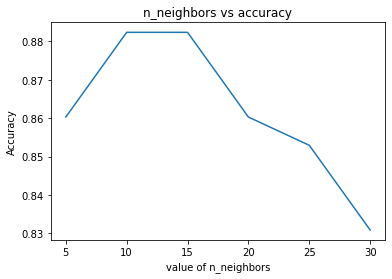

In [354]:
# Instantiate a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=15)
# Fit the model to the training data
knn.fit(X_train_scaled, y_train)
# Make predictions on the testing set
knn_pred = knn.predict(X_test_scaled)

# calculate the confusion matrix
knn_confusion_mat = confusion_matrix(y_test, knn_pred)
# calculate the accuracy, precision, and recall
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
print("Confusion Matrix:")
print(knn_confusion_mat)
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)


# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")


n_neighbor = [5, 10, 15, 20, 25, 30]
accuracy_ = [0.8602941176470589,0.8823529411764706, 0.8823529411764706,0.8602941176470589,0.8529411764705882,0.8308823529411765]
plt.plot(n_neighbor,accuracy_)
plt.xlabel("value of n_neighbors")
plt.ylabel("Accuracy")
plt.title("n_neighbors vs accuracy")
plt.show()


# SCATTERPLOT

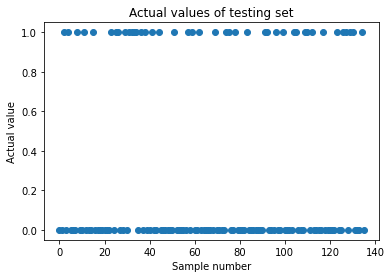

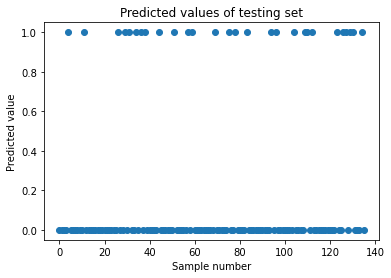

In [370]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test_scaled))

# Get the actual values for the testing data
actual_values = y_test

# Get the predicted values for the testing data
predicted_values = knn_pred

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()



# SVM

In [360]:
# create an instance of the SVM classifier
svm_clf = svm.SVC()
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)

# calculate the confusion matrix
svm_confusion_mat = confusion_matrix(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(svm_clf, X_train_scaled, y_train, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(svm_confusion_mat)
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)


Cross-validation scores: [0.90243902 0.92682927 0.87804878 0.97560976 0.85365854 0.95
 0.975      0.825      0.85       0.875     ]
Mean cross-validation score: 0.90
Confusion Matrix:
[[90  4]
 [15 27]]
Accuracy: 0.8602941176470589
Precision: 0.8709677419354839
Recall: 0.6428571428571429


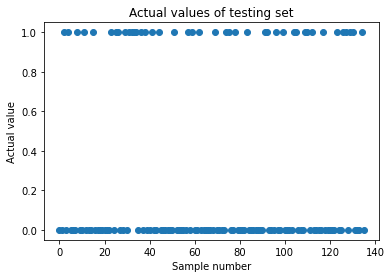

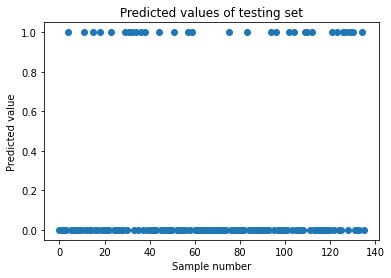

In [375]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test_scaled))

# Get the actual values for the testing data
actual_values = y_test

# Get the predicted values for the testing data
predicted_values = svm_pred

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()



In [361]:
# Create an instance of the LogisticRegression class
logisticreg_clf = LogisticRegression()
# Train the model on the training data
logisticreg_clf.fit(X_train_scaled, y_train)
# Make predictions on the test data
logisticreg_pred = logisticreg_clf.predict(X_test_scaled)

# calculate the confusion matrix
logisticreg_mat = confusion_matrix(y_test, logisticreg_pred)
# calculate the accuracy, precision, and recall
logisticreg_accuracy = accuracy_score(y_test, logisticreg_pred)
logisticreg_precision = precision_score(y_test, logisticreg_pred)
logisticreg_recall = recall_score(y_test, logisticreg_pred)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(logisticreg_clf, X_train_scaled, y_train, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(logisticreg_mat)
print("Accuracy:", logisticreg_accuracy)
print("Precision:", logisticreg_precision)
print("Recall:", logisticreg_recall)

Cross-validation scores: [0.90243902 0.90243902 0.85365854 0.92682927 0.85365854 0.9
 0.975      0.875      0.8        0.85      ]
Mean cross-validation score: 0.88
Confusion Matrix:
[[86  8]
 [13 29]]
Accuracy: 0.8455882352941176
Precision: 0.7837837837837838
Recall: 0.6904761904761905


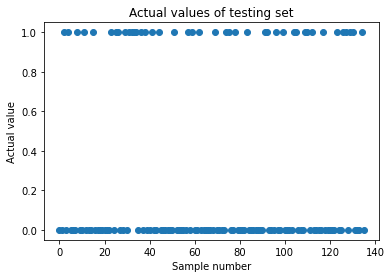

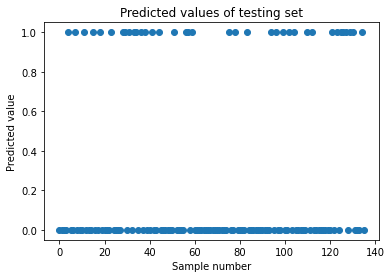

In [344]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test))

# Get the actual values for the testing data
actual_values = y_test

# Get the predicted values for the testing data
predicted_values = logisticreg_pred

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()



In [362]:
# Create an instance of the RandomForestClassifier class
randomforest_clf = RandomForestClassifier(n_estimators=100, max_depth=10)
# Fit the model to the training data
randomforest_clf.fit(X_train_scaled, y_train)
# Make predictions on the test data
randomforest_pred = randomforest_clf.predict(X_test_scaled)

# calculate the confusion matrix
randomforest_mat = confusion_matrix(y_test, randomforest_pred)
# calculate the accuracy, precision, and recall
randomforest_accuracy = accuracy_score(y_test, randomforest_pred)
randomforest_precision = precision_score(y_test, randomforest_pred)
randomforest_recall = recall_score(y_test, randomforest_pred)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(randomforest_clf, X_train_scaled, y_train, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(randomforest_mat)
print("Accuracy:", randomforest_accuracy)
print("Precision:", randomforest_precision)
print("Recall:", randomforest_recall)

Cross-validation scores: [0.87804878 0.87804878 0.90243902 0.97560976 0.85365854 0.975
 0.925      0.875      0.925      0.925     ]
Mean cross-validation score: 0.91
Confusion Matrix:
[[89  5]
 [ 9 33]]
Accuracy: 0.8970588235294118
Precision: 0.868421052631579
Recall: 0.7857142857142857


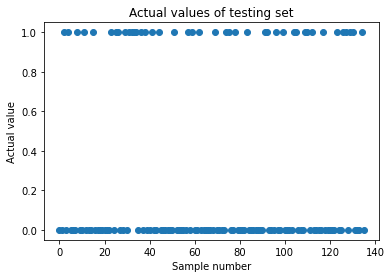

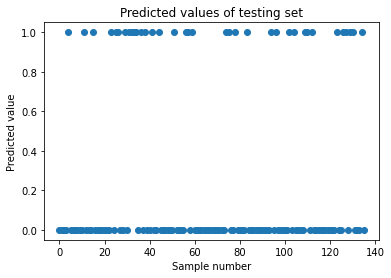

In [342]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test))

# Get the actual values for the testing data
actual_values = y_test

# Get the predicted values for the testing data
predicted_values = randomforest_pred

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()



In [363]:
import xgboost as xgb

# Set up XGBoost model
xg_clf = xgb.XGBClassifier(objective='binary:logistic',  # binary classification
                           max_depth=3,  # maximum depth of tree
                           learning_rate=0.1,  # learning rate
                           n_estimators=100)  # number of trees to build

# Fit XGBoost model to training data
xg_clf.fit(X_train_scaled, y_train)

# Make predictions on test data
xg_pred = xg_clf.predict(X_test_scaled)

xg_mat = confusion_matrix(y_test, xg_pred)
# calculate the accuracy, precision, and recall
xg_accuracy = accuracy_score(y_test, xg_pred)
xg_precision = precision_score(y_test, xg_pred)
xg_recall = recall_score(y_test, xg_pred)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(xg_clf, X_train_scaled, y_train, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(xg_mat)
print("Accuracy:", xg_accuracy)
print("Precision:", xg_precision)
print("Recall:", xg_recall)

Cross-validation scores: [0.87804878 0.85365854 0.92682927 0.95121951 0.82926829 0.975
 0.875      0.85       0.9        0.875     ]
Mean cross-validation score: 0.89
Confusion Matrix:
[[88  6]
 [ 8 34]]
Accuracy: 0.8970588235294118
Precision: 0.85
Recall: 0.8095238095238095


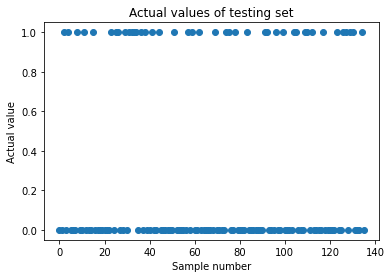

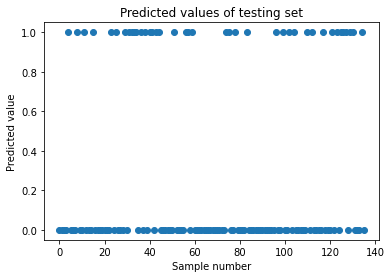

In [347]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test))

# Get the actual values for the testing data
actual_values = y_test

# Get the predicted values for the testing data
predicted_values = xg_pred

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()



In [173]:
list_accuracy = []
list_precision = []
list_recall = []

# append evaluation matrix to respective list
list_accuracy.append(knn_accuracy)
list_precision.append(knn_precision)
list_recall.append(knn_recall)

# append evaluation matrix to respective list
list_accuracy.append(svm_accuracy)
list_precision.append(svm_precision)
list_recall.append(svm_recall)

# append evaluation matrix to respective list
list_accuracy.append(logisticreg_accuracy)
list_precision.append(logisticreg_precision)
list_recall.append(logisticreg_recall)

# append evaluation matrix to respective list
list_accuracy.append(randomforest_accuracy)
list_precision.append(randomforest_precision)
list_recall.append(randomforest_recall)

# append evaluation matrix to respective list
list_accuracy.append(xg_accuracy)
list_precision.append(xg_precision)
list_recall.append(xg_recall)


# SECOND EXPERIMENTAL SETUP: APPLY FEATURE SELECTION METHOD TO SELECT MOST INFORMATIVE FEATURES. 


In [412]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
# Select the top 10 features
k = 10
features = X.columns.tolist()

# Perform univariate feature selection
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
mask = selector.get_support()
selected_features = []
for bool, feature in zip(mask, features):
    if bool:
        selected_features.append(feature)
print(f"Selected features: {selected_features}")

# Create a new dataframe with the selected features and data points
df_selected = pd.DataFrame(data=X, columns=selected_features)



Selected features: ['Weight (Kg)', 'BMI', 'Cycle(R/I)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)']


In [263]:
# Select the top 2 features using chi2
selector = SelectKBest(score_func=chi2, k=2)

X_new = selector.fit_transform(X, y)
mask = selector.get_support()
selected_features = []

for bool, feature in zip(mask, features):
    if bool:
        selected_features.append(feature)

print("Selected features:", selected_features)


Selected features: ['BMI', 'Follicle No. (R)']


In [264]:
X_selected= df_selected[['Weight (Kg)', 'BMI', 'Cycle(R/I)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 
                         'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
                         'Follicle No. (L)', 'Follicle No. (R)']]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# dataset standardization (if needed)
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)


# KNN CLASSIFIER

In [390]:
# INSTANTIATED NEW KNNC FOR EASY TO FOLLOW FOR EVERYONE, KNN OF SETUP1 CAN ALSO BE USED HERE, THEYRE SAME
knn_2 = KNeighborsClassifier(n_neighbors=10)
# Fit the model to the training data
knn_2.fit(X_train_scaled_2, y_train_2)

# Make predictions on the testing set
knn_pred_2 = knn_2.predict(X_test_scaled_2)

# calculate the confusion matrix
knn_confusion_mat_2 = confusion_matrix(y_test_2, knn_pred_2)
# calculate the accuracy, precision, and recall
knn_accuracy_2 = accuracy_score(y_test_2, knn_pred_2)
knn_precision_2 = precision_score(y_test_2, knn_pred_2)
knn_recall_2 = recall_score(y_test_2, knn_pred_2)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(knn_2, X_train_scaled_2, y_train_2, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(knn_confusion_mat_2)
print("Accuracy:", knn_accuracy_2)
print("Precision:", knn_precision_2)
print("Recall:", knn_recall_2)

Cross-validation scores: [0.87804878 0.80487805 0.92682927 0.97560976 0.80487805 0.925
 0.875      0.825      0.825      0.9       ]
Mean cross-validation score: 0.87
Confusion Matrix:
[[93  1]
 [15 27]]
Accuracy: 0.8823529411764706
Precision: 0.9642857142857143
Recall: 0.6428571428571429


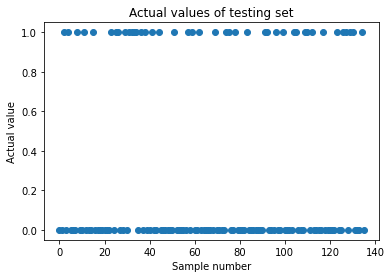

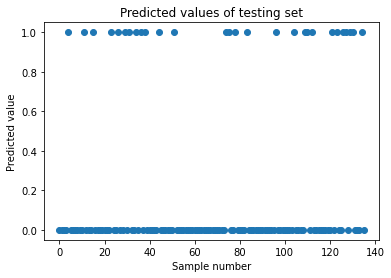

In [384]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test_scaled_2))

# Get the actual values for the testing data
actual_values = y_test_2

# Get the predicted values for the testing data
predicted_values = knn_pred_2

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()


# SVM CLASSIFIER

In [391]:
# create an instance of the SVM classifier
svm_clf_2 = svm.SVC()
svm_clf_2.fit(X_train_scaled_2, y_train_2)
svm_pred_2 = svm_clf_2.predict(X_test_scaled_2)

# calculate the confusion matrix
svm_confusion_mat_2 = confusion_matrix(y_test_2, svm_pred_2)
svm_accuracy_2 = accuracy_score(y_test_2, svm_pred_2)
svm_precision_2 = precision_score(y_test_2, svm_pred_2)
svm_recall_2 = recall_score(y_test_2, svm_pred_2)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(svm_clf_2, X_train_scaled_2, y_train_2, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(svm_confusion_mat_2)
print("Accuracy:", svm_accuracy_2)
print("Precision:", svm_precision_2)
print("Recall:", svm_recall_2)

Cross-validation scores: [0.90243902 0.90243902 0.92682927 0.90243902 0.82926829 0.95
 0.925      0.875      0.925      0.9       ]
Mean cross-validation score: 0.90
Confusion Matrix:
[[91  3]
 [ 8 34]]
Accuracy: 0.9191176470588235
Precision: 0.918918918918919
Recall: 0.8095238095238095


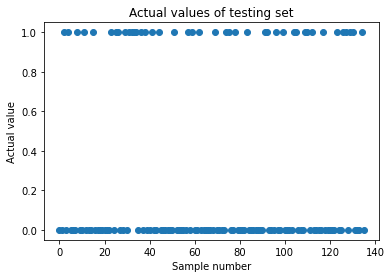

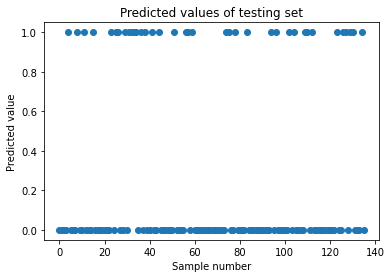

In [389]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test_scaled_2))

# Get the actual values for the testing data
actual_values = y_test_2

# Get the predicted values for the testing data
predicted_values = svm_pred_2

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()


# LOGISTIC REGRESSION

In [392]:
# Create an instance of the LogisticRegression class
logisticreg_clf_2 = LogisticRegression()

# Train the model on the training data
logisticreg_clf_2.fit(X_train_scaled_2, y_train_2)

# Make predictions on the test data
logisticreg_pred_2 = logisticreg_clf_2.predict(X_test_scaled_2)

# calculate the confusion matrix
logisticreg_mat_2 = confusion_matrix(y_test_2, logisticreg_pred_2)
# calculate the accuracy, precision, and recall
logisticreg_accuracy_2 = accuracy_score(y_test_2, logisticreg_pred_2)
logisticreg_precision_2 = precision_score(y_test_2, logisticreg_pred_2)
logisticreg_recall_2 = recall_score(y_test_2, logisticreg_pred_2)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(logisticreg_clf_2, X_train_scaled_2, y_train_2, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(logisticreg_mat_2)
print("Accuracy:", logisticreg_accuracy_2)
print("Precision:", logisticreg_precision_2)
print("Recall:", logisticreg_recall_2)

Cross-validation scores: [0.90243902 0.92682927 0.92682927 1.         0.85365854 0.95
 0.9        0.875      0.95       0.925     ]
Mean cross-validation score: 0.92
Confusion Matrix:
[[89  5]
 [ 8 34]]
Accuracy: 0.9044117647058824
Precision: 0.8717948717948718
Recall: 0.8095238095238095


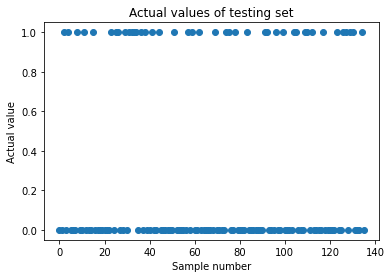

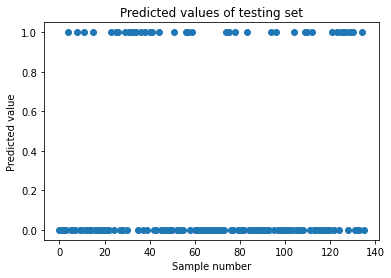

In [395]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test_scaled_2))

# Get the actual values for the testing data
actual_values = y_test_2

# Get the predicted values for the testing data
predicted_values = logisticreg_pred_2

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()


# RANDOM FOREST CLASSIFIER

In [397]:
# Create an instance of the RandomForestClassifier class
randomforest_clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)

# Fit the model to the training data
randomforest_clf_2.fit(X_train_scaled_2, y_train_2)

# Make predictions on the test data
randomforest_pred_2 = randomforest_clf_2.predict(X_test_scaled_2)

# calculate the confusion matrix
randomforest_mat_2 = confusion_matrix(y_test_2, randomforest_pred_2)
# calculate the accuracy, precision, and recall
randomforest_accuracy_2 = accuracy_score(y_test_2, randomforest_pred_2)
randomforest_precision_2 = precision_score(y_test_2, randomforest_pred_2)
randomforest_recall_2 = recall_score(y_test_2, randomforest_pred_2)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(randomforest_clf_2, X_train_scaled_2, y_train_2, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(randomforest_mat_2)
print("Accuracy:", randomforest_accuracy_2)
print("Precision:", randomforest_precision_2)
print("Recall:", randomforest_recall_2)

Cross-validation scores: [0.90243902 0.87804878 0.92682927 0.97560976 0.7804878  0.975
 0.95       0.825      0.9        0.875     ]
Mean cross-validation score: 0.90
Confusion Matrix:
[[87  7]
 [ 8 34]]
Accuracy: 0.8897058823529411
Precision: 0.8292682926829268
Recall: 0.8095238095238095


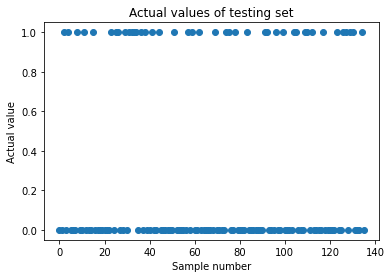

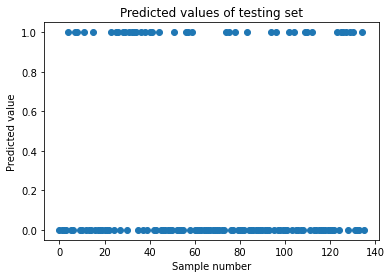

In [399]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test_scaled_2))

# Get the actual values for the testing data
actual_values = y_test_2

# Get the predicted values for the testing data
predicted_values = randomforest_pred_2

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()


# XGBOOSTING 

In [268]:
import xgboost as xgb

# Set up XGBoost model
xg_clf_2 = xgb.XGBClassifier(objective='binary:logistic',  # binary classification
                           max_depth=3,  # maximum depth of tree
                           learning_rate=0.1,  # learning rate
                           n_estimators=100)  # number of trees to build

# Fit XGBoost model to training data
xg_clf_2.fit(X_train_2, y_train_2)

# Make predictions on test data
xg_pred_2 = xg_clf_2.predict(X_test_2)

xg_mat_2 = confusion_matrix(y_test_2, xg_pred_2)
# calculate the accuracy, precision, and recall
xg_accuracy_2 = accuracy_score(y_test_2, xg_pred_2)
xg_precision_2 = precision_score(y_test_2, xg_pred_2)
xg_recall_2 = recall_score(y_test_2, xg_pred_2)

# K-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
scores = cross_val_score(xg_clf_2, X_train_2, y_train_2, cv=kfold)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

print("Confusion Matrix:")
print(xg_mat_2)
print("Accuracy:", xg_accuracy_2)
print("Precision:", xg_precision_2)
print("Recall:", xg_recall_2)

Cross-validation scores: [0.87804878 0.87804878 0.92682927 0.95121951 0.82926829 0.975
 0.9        0.825      0.9        0.875     ]
Mean cross-validation score: 0.89
Confusion Matrix:
[[88  6]
 [ 9 33]]
Accuracy: 0.8897058823529411
Precision: 0.8461538461538461
Recall: 0.7857142857142857


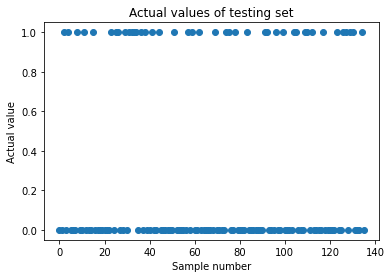

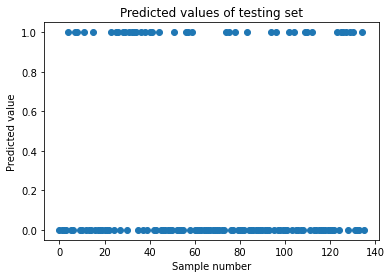

In [402]:
# Get the sample numbers for the testing data
sample_numbers = range(len(X_test_scaled_2))

# Get the actual values for the testing data
actual_values = y_test_2

# Get the predicted values for the testing data
predicted_values = randomforest_pred_2

plt.scatter(sample_numbers, actual_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Actual value")
plt.title("Actual values of testing set")
# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(sample_numbers, predicted_values)

# Add axis labels
plt.xlabel("Sample number")
plt.ylabel("Predicted value")
plt.title("Predicted values of testing set")
# Show the plot
plt.show()


In [171]:
list_accuracy_2 = []
list_precision_2 = []
list_recall_2 = []

# append evaluation matrix to respective list
list_accuracy_2.append(knn_accuracy_2)
list_precision_2.append(knn_precision_2)
list_recall_2.append(knn_recall_2)

# append evaluation matrix to respective list
list_accuracy_2.append(svm_accuracy_2)
list_precision_2.append(svm_precision_2)
list_recall_2.append(svm_recall_2)

# append evaluation matrix to respective list
list_accuracy_2.append(logisticreg_accuracy_2)
list_precision_2.append(logisticreg_precision_2)
list_recall_2.append(logisticreg_recall_2)

# append evaluation matrix to respective list
list_accuracy_2.append(randomforest_accuracy_2)
list_precision_2.append(randomforest_precision_2)
list_recall_2.append(randomforest_recall_2)

# append evaluation matrix to respective list
list_accuracy_2.append(xg_accuracy_2)
list_precision_2.append(xg_precision_2)
list_recall_2.append(xg_recall_2)


# GRAPH ANALYSIS 

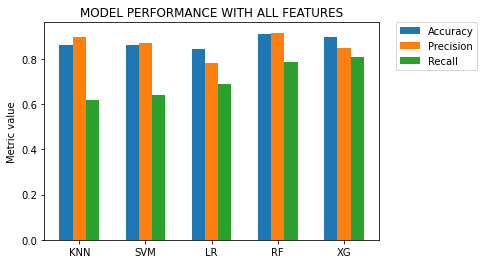

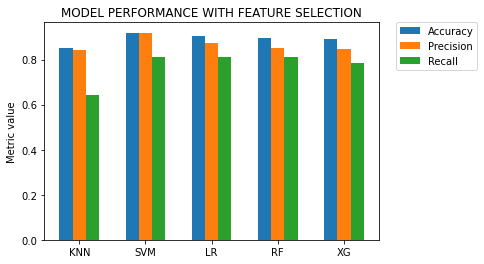

In [406]:
#plot the evaluation matrix of each model

# evaluation metrics stored in variables:
# `accuracies`, `precisions`, and `recalls` for each model, respectively.
# list models evaluation matrix according to variables.

# Create a figure and an axis
fig, ax = plt.subplots()
models = ['KNN','SVM','LR','RF','XG']
# Set the x-axis labels
x_labels = models

# Set the positions and the width of the bars
pos = range(len(models))
width = 0.2

# Plot the bars for the accuracy metric
acc_bars = ax.bar(
    [p - width for p in pos], # Shift the bars to the left
    list_accuracy,
    width,
    label='Accuracy'
)

# Plot the bars for the precision metric
prec_bars = ax.bar(
    pos, # No shift for the precision bars
    list_precision,
    width,
    label='Precision'
)

# Plot the bars for the recall metric
rec_bars = ax.bar(
    [p + width for p in pos], # Shift the bars to the right
    list_recall,
    width,
    label='Recall'
)

# Set the axis labels and the title
ax.set_ylabel('Metric value')
ax.set_title('MODEL PERFORMANCE WITH ALL FEATURES')

# Set the x-axis tick labels
ax.set_xticks(pos)
ax.set_xticklabels(x_labels)

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


#plot the evaluation matrix of each model

# evaluation metrics stored in variables:
# `accuracies`, `precisions`, and `recalls` for each model, respectively.
# list models evaluation matrix according to variables.

# Create a figure and an axis
fig, ax = plt.subplots()
models = ['KNN','SVM','LR','RF','XG']
# Set the x-axis labels
x_labels = models

# Set the positions and the width of the bars
pos = range(len(models))
width = 0.2

# Plot the bars for the accuracy metric
acc_bars = ax.bar(
    [p - width for p in pos], # Shift the bars to the left
    list_accuracy_2,
    width,
    label='Accuracy'
)

# Plot the bars for the precision metric
prec_bars = ax.bar(
    pos, # No shift for the precision bars
    list_precision_2,
    width,
    label='Precision'
)

# Plot the bars for the recall metric
rec_bars = ax.bar(
    [p + width for p in pos], # Shift the bars to the right
    list_recall_2,
    width,
    label='Recall'
)

# Set the axis labels and the title
ax.set_ylabel('Metric value')
ax.set_title('MODEL PERFORMANCE WITH FEATURE SELECTION')

# Set the x-axis tick labels
ax.set_xticks(pos)
ax.set_xticklabels(x_labels)

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


In [407]:
# dictionary for evaluation matrix and respective model
eval_dict = {'Model': models, 'Accuracy': list_accuracy, 'Precision': list_precision, 'Recall': list_recall}

# Create a dataframe from the dictionary
df = pd.DataFrame(eval_dict)

from IPython.display import display
display(df)


eval_dict_2 = {'Model': models, 'Accuracy': list_accuracy_2, 'Precision': list_precision_2, 'Recall': list_recall_2}

# Create a dataframe from the dictionary
df_2 = pd.DataFrame(eval_dict_2)

from IPython.display import display
display(df_2)

,Model,Accuracy,Precision,Recall
0,KNN,0.860294,0.896552,0.619048
1,SVM,0.860294,0.870968,0.642857
2,LR,0.845588,0.783784,0.690476
3,RF,0.911765,0.916667,0.785714
4,XG,0.897059,0.850000,0.809524


,Model,Accuracy,Precision,Recall
0,KNN,0.852941,0.843750,0.642857
1,SVM,0.919118,0.918919,0.809524
2,LR,0.904412,0.871795,0.809524
3,RF,0.897059,0.850000,0.809524
4,XG,0.889706,0.846154,0.785714


<AxesSubplot:>

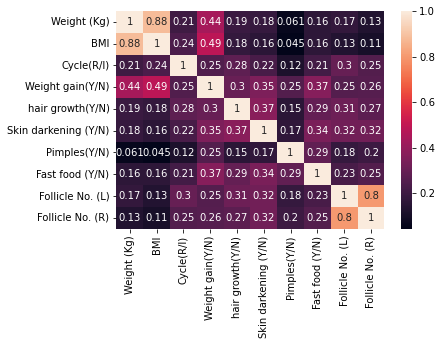

In [413]:
corr_2 = X_selected.corr()

# Create the heatmap
sns.heatmap(data=corr_2, annot=True)

# COMPARATIVE ANALYSIS OF TWO MODELS

In [423]:
from sklearn.metrics import f1_score

# Calculate F1 score for model 1

f1_randomforest = f1_score(y_test, randomforest_pred)
f1_knn = f1_score(y_test, knn_pred)
f1_svm = f1_score(y_test, svm_pred)
f1_lr = f1_score(y_test, logisticreg_pred)
f1_xg = f1_score(y_test, xg_pred)
# Calculate F1 score for model 2

f1_svm_2 = f1_score(y_test_2, svm_pred_2)
f1_randomforest_2 = f1_score(y_test_2, randomforest_pred_2)
f1_knn_2 = f1_score(y_test_2, knn_pred_2)
f1_lr_2 = f1_score(y_test_2, logisticreg_pred_2)
f1_xg_2 = f1_score(y_test_2, xg_pred_2)
print("setup 1 ")
print("F1 score of knn: ", f1_knn)
print("F1 score of SVM: ", f1_svm)
print("F1 score of random forest: ", f1_randomforest)
print("F1 score of logistic regression: ", f1_lr)
print("F1 score of xgboosting: ", f1_xg)
print("setup 2 ")
print("F1 score of SVM: ", f1_svm_2)
print("F1 score of knn: ", f1_knn_2)
print("F1 score of random forest: ", f1_randomforest_2)
print("F1 score of logistic regression: ", f1_lr_2)
print("F1 score of xgboosting: ", f1_xg_2)

# Compare the F1 scores
if f1_randomforest > f1_svm_2:
  print("Model 1 has a better F1 score.")
elif f1_randomforest < f1_svm_2:
  print("Model 2 has a better F1 score.")
else:
  print("Model 1 and Model 2 have the same F1 score.")


setup 1 
F1 score of knn:  0.7714285714285715
F1 score of SVM:  0.7397260273972603
F1 score of random forest:  0.825
F1 score of logistic regression:  0.7341772151898734
F1 score of xgboosting:  0.8292682926829269
setup 2 
F1 score of SVM:  0.860759493670886
F1 score of knn:  0.7714285714285715
F1 score of random forest:  0.8192771084337348
F1 score of logistic regression:  0.8395061728395062
F1 score of xgboosting:  0.8148148148148148
Model 2 has a better F1 score.
